## Цель
Изучить основные методы оценки качества модели машинного обучения и их применение для анализа производительности и обобщающей способности модели.

## Шаги выполнения
Изучение метрик оценки качества модели.

Применение метрик к обученной модели машинного обучения.

Анализ кривых ROC и PR.

Сравнение моделей.


## Библиотеки
scikit-learn

Matplotlib


## Исходные данные
Набор данных о раке молочной железы из библиотеки scikit-learn.

## Исследование метрик оценки качества модели
Изучим основные метрики:

Точность (accuracy): доля правильно предсказанных наблюдений.

Полнота (recall): способность модели находить все положительные наблюдения.

Точность (precision): доля правильно предсказанных положительных наблюдений.

F1-мера: гармоническое среднее точности и полноты.

ROC-AUC: площадь под кривой ROC, показывает способность модели различать классы.



In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Загрузка данных

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

 ## разделение датасета

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

## Предсказание классов и вероятностей

In [8]:
y_pred = clf.predict(X_test)
y_pred_probabilities = clf.predict_proba(X_test)[:, 1]

## Расчет метрик

In [5]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probabilities)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


Accuracy: 0.9707602339181286
Precision: 0.963963963963964
Recall: 0.9907407407407407
F1 Score: 0.9771689497716894
ROC AUC Score: 0.9968400940623163


## Построение кривых ROC и PR

In [9]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [10]:
## Кривая Precision-Recall

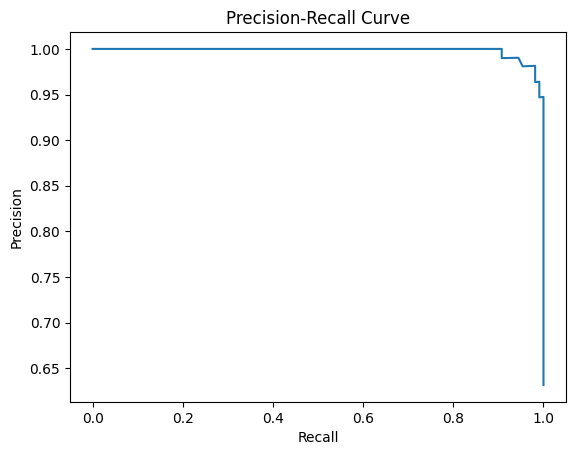

In [11]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probabilities)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Кривая ROC

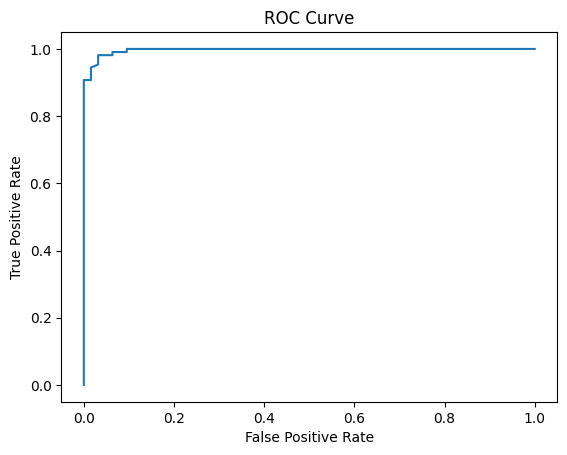

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilities)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Сравнение моделей

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Предположим, у нас есть несколько моделей: Logistic Regression, SVC, Random Forest
model1 = LogisticRegression(random_state=42)
model2 = SVC(probability=True, random_state=42)
model3 = RandomForestClassifier(random_state=42)

models = [model1, model2, model3]
model_names = ["Logistic Regression", "SVC", "Random Forest"]
accuracies = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Вывод результатов сравнения
for name, accuracy in zip(model_names, accuracies):
    print(f'{name} Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9707602339181286
SVC Accuracy: 0.935672514619883
Random Forest Accuracy: 0.9707602339181286


## Заключение
В данной лабораторной работе были изучены основные метрики оценки качества модели машинного обучения и их применение для анализа производительности
и обобщающей способности модели.

Были построены кривые ROC и PR для визуального анализа производительности модели.

Также было произведено сравнение нескольких моделей по метрике точности.